In [1]:
#Assignment 3
#Determining and removing drawbacks of exponential and running mean. Task 1
#I. Backward exponential smoothing
#II. Drawbacks of running mean
#Team 12
#Yaroslav Savotin, Elizaveta Pestova, Selamawit
#Skoltech, 2023

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Part 1
#Step 1 - prepare dataset for backward exponential smoothing 

#we use code from Assignment 2 with forward exponential smoothing to applu a new method on it
#------------№1------------


n2 = 300
X2 = [0 for _ in range(n2)]
X2[0] = 10

# normally distributed random noise with zero mathematical expectation and variance 
mu, sigma1 = 0, 28**2
w2 = np.random.normal(mu, np.sqrt(sigma1), [n2,1])

for i in range(n2-1):
    X2[i+1] = X2[i] + w2[i+1]
    
#------------№2------------
Z2 = [0 for _ in range(n2)]

# normally distributed random noise with zero mathematical expectation and variance 
mu, sigma2 = 0, 97**2
nu2 = np.random.normal(mu, np.sqrt(sigma2), [n2,1])

for i in range(n2):
    Z2[i] = X2[i] + nu2[i]
    
#------------№3------------
ksi = sigma1/sigma2
alfa = (-ksi + np.sqrt(ksi**2 + 4*ksi))/2


#------------№4------------
M = int((2-alfa)/alfa)
sigmaRM = sigma2/M
sigmaES = (sigma2*alfa)/(2-alfa)

#------------№5------------
#running mean

R = [0 for _ in range(n2)]
sum = 0
r = int((M-1)/2) #3

for j in range(3,n2-3):
    for i in range(r+1):
        if i == 0:
            sum += Z2[j-i]
        else:
            sum += Z2[j-i] + Z2[j+i]
    R[j] = sum/M
    sum = 0
    
for j in range(r):
    for i in range(r):
        sum += Z2[j+i]
    R[j] = sum/r
    sum = 0
    
for j in range(n2-r,n2):
    for i in range(r):
        sum += Z2[j-i]
    R[j] = sum/r
    sum = 0

#Exponential mean
Xsm = [0 for _ in range(n2)]
Xsm[0] = X2[0]
for i in range(1,n2):
    Xsm[i] = Xsm[i-1] + alfa*(Z2[i] - Xsm[i-1])

In [3]:
#Step 2 - apply backward exponential smoothing

Xsm_back = [0 for _ in range(n2)]
Xsm_back[n2-1] = X2[n2-1]
for i in range(n2-2,-1,-1):
    Xsm_back[i] = Xsm_back[i+1] + alfa*(Xsm[i] - Xsm_back[i+1])


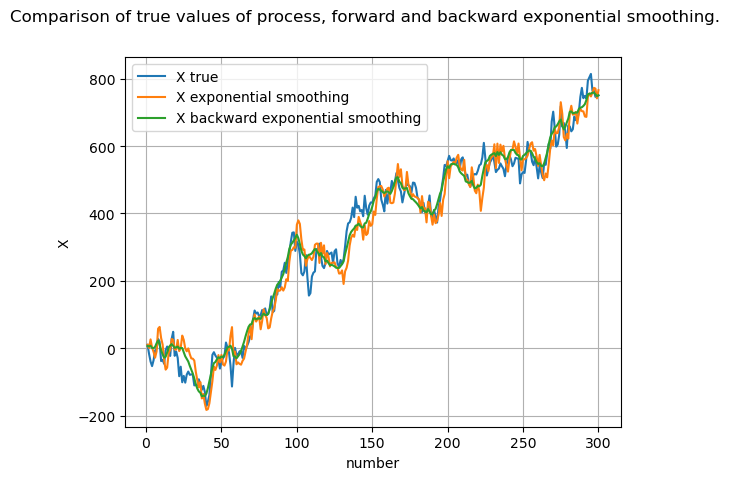

In [4]:
#Step 3 - for the visual comparison of real measurments and postpocessed data we create a plot
#preparation for plotting
k = [1 for _ in range(n2)]
for i in range(n2-1):
    k[i+1] = k[i] + 1
for i in range(1,n2):
    Xsm[i] = Xsm[i][0] 
for i in range(1,n2):
    X2[i] = X2[i][0] 
for i in range(0,n2):
    Xsm_back[i] = Xsm_back[i][0]
    
#plot
y1 = X2
y3 = Xsm_back
y2 = Xsm
x = k
plt.plot(x,y1,label = 'X true')
plt.plot(x,y2,label = 'X exponential smoothing')
plt.plot(x,y3,label = 'X backward exponential smoothing')
plt.xlabel('number')
plt.ylabel('X')
plt.suptitle('Comparison of true values of process, forward and backward exponential smoothing.')
plt.legend()
plt.grid(True)

In [5]:
#Conclusion: plot shows us how applying  backward smoothing helps us to put away the shift of forward smoothing


In [6]:
#Part 2 - investigations of drawbacks of running mean
#Step 1 - for the First trajectory we create process which rate of change is changed
#insignificantly and measurement noise is great
n = 300

mu, sigma1 = 0, 10
a = np.random.normal(mu, np.sqrt(sigma1), [n,1])

X = [0 for _ in range(n)]
V = [0 for _ in range(n)]
X[0] = 5
V[0] = 0
T = 0.1
#with setted formulas we create our model of moution
for i in range(1,n):
    V[i] = V[i-1] + T*a[i-1]
    
for i in range(1,n):
    X[i] = X[i-1] + T*V[i-1] + (a[i-1]*T**2)/2

In [7]:
#then we create measurements of our motion process with certain variance
Z = [0 for _ in range(n)]

# normally distributed random noise with zero mathematical expectation and variance 
mu, sigma2 = 0, 500
nu = np.random.normal(mu, np.sqrt(sigma2), [n,1])


for i in range(n):
    Z[i] = X[i] + nu[i]

In [8]:
#Step 2 - determine empirically the window size M
# as our trajectory is close to the line and noise of measurements is big, we want our smoothing to bee less sensitive to noise,
#so the window of smoothing must be big enough (for running mean) and the alpha must be small (for exponential smoothing)
#applying Running mean smoothing with big M
M = 30
R = [0 for _ in range(n)]
sum = 0
r = int((M-1)/2)

for j in range(r,n-r):
    for i in range(r+1):
        if i == 0:
            sum += Z[j-i]
        else:
            sum += Z[j-i] + Z[j+i]
    R[j] = sum/M
    sum = 0
    
for j in range(r):
    for i in range(r):
        sum += Z[j+i]
    R[j] = sum/r
    sum = 0
    
for j in range(n-r,n):
    for i in range(r):
        sum += Z[j-i]
    R[j] = sum/r
    sum = 0

#applying Exponential smoothing with small alfa
alfa = 0.05
def Exp_smoothing(Z_f,n_f, alpha):
    Xsm_f = [0 for _ in range(n_f)]
    Xsm_f[0] = X[0]
    for i in range(1,n_f):
        Xsm_f[i] = Xsm_f[i-1] + alpha*(Z_f[i] - Xsm_f[i-1])
    return Xsm_f

Xsm = Exp_smoothing(Z,n,alfa)


In [9]:
#preparation for plotting
k = [1 for _ in range(n)]
for i in range(n-1):
    k[i+1] = k[i] + 1
for i in range(1,n):
    X[i] = X[i][0] 

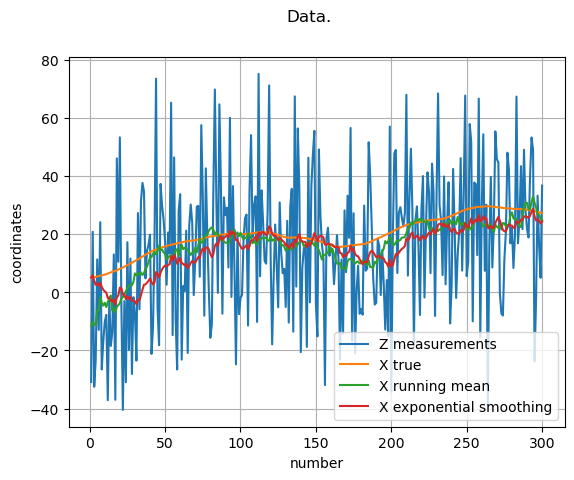

In [10]:
for i in range(1,n):
    Xsm[i] = Xsm[i][0] 
for i in range(0,n):
    R[i] = R[i][0]
    
#plot
#alpha ~ 0.05
y1 = Z
y2 = X
y3 = R
y4 = Xsm
x = k
plt.plot(x,y1,label = 'Z measurements')
plt.plot(x,y2,label = 'X true')
plt.plot(x,y3,label = 'X running mean')
plt.plot(x,y4,label = 'X exponential smoothing')
plt.xlabel('number')
plt.ylabel('coordinates')
plt.suptitle('Data.')
plt.legend()
plt.grid(True)

In [11]:
#deviation and variability indicators for running mean

#smoothing at different alpha values
alfa_plot = [0 for _ in range(19)]
Xsm_array = [0 for _ in range(19)]
k = 0
Xsm_array = [0 for _ in range(19)]
for i in range(5,100,5):
    alfa = i/100
    Xsm_array[k] = Exp_smoothing(Z,n,alfa)
    alfa_plot[k] = i/100
    k +=1
#Xsm_array
for j in range(19):
    for i in range(1,n):
        Xsm_array[j][i] = Xsm_array[j][i][0]
for i in range(n):
    Z[i] = Z[i][0] 

In [12]:
#Id_rm = np.sum(np.square(Z-R))

#Iv_rm = 0

#for j in range(n-2):
    #Iv_rm += (R[j+2] - 2*R[j+1] + R[j])**2


In [13]:
#deviation and variability indicators for exponential mean (different alpha)

#Deviation indicator
Id_em = [0 for _ in range(19)]
for i in range(19):
    for j in range(n):
        Id_em[i] += np.square(Z[j] - Xsm_array[i][j])
        
#Variability indicator
Iv_em = [0 for _ in range(19)]
for i in range(19):
    for j in range(n-2):
        Iv_em[i] += (Xsm_array[i][j+2] - 2*Xsm_array[i][j+1] + Xsm_array[i][j])**2

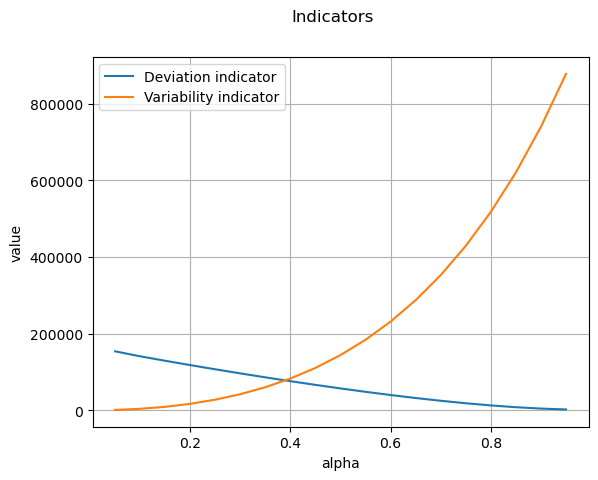

In [14]:
y1 = Id_em
y2 = Iv_em
y4 = Xsm
x = alfa_plot
plt.plot(x,y1,label = 'Deviation indicator')
plt.plot(x,y2,label = 'Variability indicator')
plt.xlabel('alpha')
plt.ylabel('value')
plt.suptitle('Indicators')
plt.legend()
plt.grid(True)

In [15]:
#The balance point value of both indicators was selected
#alpha ~ 0.4
Xsm = Exp_smoothing(Z,n,0.4)
#for i in range(1,n):
#    Xsm[i] = Xsm[i][0] 
k = [1 for _ in range(n)]
for i in range(n-1):
    k[i+1] = k[i] + 1

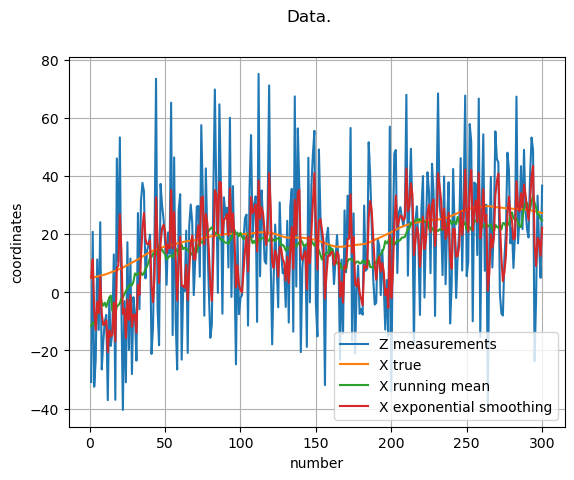

In [16]:
#plot
#alpha ~ 0.4
y1 = Z
y2 = X
y3 = R
y4 = Xsm
x = k
plt.plot(x,y1,label = 'Z measurements')
plt.plot(x,y2,label = 'X true')
plt.plot(x,y3,label = 'X running mean')
plt.plot(x,y4,label = 'X exponential smoothing')
plt.xlabel('number')
plt.ylabel('coordinates')
plt.suptitle('Data.')
plt.legend()
plt.grid(True)

In [17]:
#print('Deviation ind for running mean =',Id_rm)
#print('Deviation ind for exponential mean =',Id_em)
#print('Variabiliry ind for running mean =',Iv_rm)
#print('Variabiliry ind for exponential mean =',Iv_em)

In [18]:
#Topic_2 - slide 38
#the dependence of M and alfa on the "smoothness" of the trajectory and the magnitude of the error

In [62]:
#Second trajectory
n = 200

mu, sigma1 = 0, 0.08**2
w = np.random.normal(mu, np.sqrt(sigma1), [n,1])

X = [0 for _ in range(n)]
A = [0 for _ in range(n)]
A[0] = 1
T = 32
omega = 2**np.pi/T

for i in range(1,n):
    A[i] = A[i-1] + w[i]
    
for i in range(0,n):
    X[i] = A[i]*np.sin(omega*i + 3)

In [63]:
Z = [0 for _ in range(n)]

# normally distributed random noise with zero mathematical expectation and variance 
mu, sigma2 = 0, 0.05
nu = np.random.normal(mu, np.sqrt(sigma2), [n,1])


for i in range(n):
    Z[i] = X[i] + nu[i]

In [96]:
#running smoothing

M = 23  #change the value M to the ones specified in the task
R = [0 for _ in range(n)]
sum = 0
r = int((M-1)/2) 

for j in range(r,n-r):
    for i in range(r+1):
        if i == 0:
            sum += Z[j-i]
        else:
            sum += Z[j-i] + Z[j+i]
    R[j] = sum/M
    sum = 0
    
for j in range(r):
    for i in range(r):
        sum += Z[j+i]
    R[j] = sum/r
    sum = 0
    
for j in range(n-r,n):
    for i in range(r):
        sum += Z[j-i]
    R[j] = sum/r
    sum = 0

In [88]:
#preparation for plotting
k = [1 for _ in range(n)]
for i in range(n-1):
    k[i+1] = k[i] + 1


In [76]:
for i in range(1,n):
    X[i] = X[i][0] 

IndexError: invalid index to scalar variable.

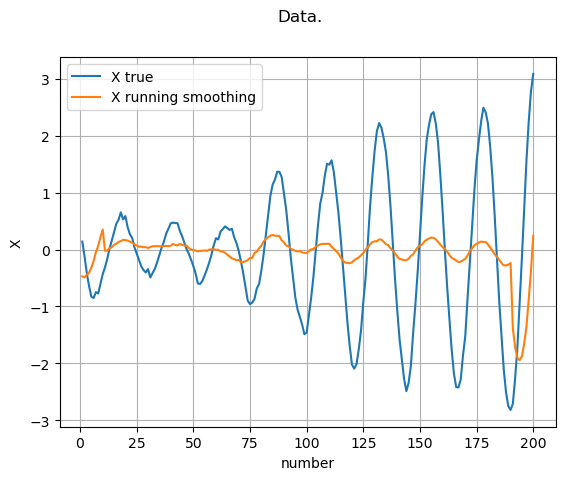

In [95]:
 for i in range(0,n):
    R[i] = R[i][0]
    
#plot
y1 = X
y2 = R
x = k
plt.plot(x,y1,label = 'X true')
plt.plot(x,y2,label = 'X running smoothing')
plt.xlabel('number')
plt.ylabel('X')
plt.suptitle('Data.')
plt.legend()
plt.grid(True)